In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or !*pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-sales-data/product_hierarchy.csv
/kaggle/input/retail-sales-data/store_cities.csv
/kaggle/input/retail-sales-data/sales.csv/sales.csv


In [2]:
data = "/kaggle/input/retail-sales-data/sales.csv/sales.csv"
stores = "/kaggle/input/retail-sales-data/store_cities.csv"
products = "/kaggle/input/retail-sales-data/product_hierarchy.csv"

## 1. Data exploration & analysis

In [3]:
sales = pd.read_csv(data, index_col = False,low_memory=False)
stores_data = pd.read_csv(stores,index_col =False)
products_data = pd.read_csv(products,index_col=False)

In [4]:
sales.head()

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19454838 entries, 0 to 19454837
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   product_id             object 
 1   store_id               object 
 2   date                   object 
 3   sales                  float64
 4   revenue                float64
 5   stock                  float64
 6   price                  float64
 7   promo_type_1           object 
 8   promo_bin_1            object 
 9   promo_type_2           object 
 10  promo_bin_2            object 
 11  promo_discount_2       float64
 12  promo_discount_type_2  object 
dtypes: float64(5), object(8)
memory usage: 1.9+ GB


In [6]:
stores_data.head()

,store_id,storetype_id,store_size,city_id
0,S0091,ST04,19,C013
1,S0012,ST04,28,C005
2,S0045,ST04,17,C008
3,S0032,ST03,14,C019
4,S0027,ST04,24,C022


In [7]:
products_data.head()

,product_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
0,P0000,5.0,20.0,12.0,NaN,H00,H0004,H000401,H00040105,H0004010534
1,P0001,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
2,P0002,22.0,40.0,22.0,cluster_0,H03,H0315,H031508,H03150800,H0315080028
3,P0004,2.0,13.0,4.0,cluster_3,H03,H0314,H031405,H03140500,H0314050003
4,P0005,16.0,30.0,16.0,cluster_9,H03,H0312,H031211,H03121109,H0312110917


In [8]:
sales.tail()

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
19454833,P0748,S0125,2019-12-29,NaN,NaN,NaN,18.9,PR14,NaN,PR03,NaN,NaN,NaN
19454834,P0748,S0126,2019-12-29,NaN,NaN,NaN,18.9,PR14,NaN,PR03,NaN,NaN,NaN
19454835,P0748,S0131,2019-12-29,NaN,NaN,NaN,18.9,PR14,NaN,PR03,NaN,NaN,NaN
19454836,P0748,S0132,2019-12-29,NaN,NaN,NaN,18.9,PR14,NaN,PR03,NaN,NaN,NaN
19454837,P0748,S0142,2019-12-29,NaN,NaN,NaN,18.9,PR14,NaN,PR03,NaN,NaN,NaN


In [9]:
sales.isnull().sum()

product_id                      0
store_id                        0
date                            0
sales                     1190762
revenue                   1190762
stock                     1190762
price                      571981
promo_type_1                    0
promo_bin_1              16803149
promo_type_2                    0
promo_bin_2              19395757
promo_discount_2         19395757
promo_discount_type_2    19395757
dtype: int64

In [10]:
sales.shape

(19454838, 13)

In [11]:
stores_data.shape

(144, 4)

In [12]:
products_data.shape

(699, 10)

### Transformation du colonne date aux format datetime

In [13]:
sales['date'] = pd.to_datetime(sales['date'])

In [14]:
cols_to_drop = ["promo_type_1","promo_bin_1","promo_bin_2","promo_type_2","promo_discount_2","promo_discount_type_2"]
sales = sales.drop(cols_to_drop,axis=1)

In [15]:
#Checking the datatypes of different columns of the data
sales.dtypes

product_id            object
store_id              object
date          datetime64[ns]
sales                float64
revenue              float64
stock                float64
price                float64
dtype: object

In [16]:
sales['product_id'] = sales['product_id'].apply(str)
sales['store_id']  = sales['store_id'].apply(str)

In [17]:
#Checking the count of NA values in each column
sales.isna().sum()

product_id          0
store_id            0
date                0
sales         1190762
revenue       1190762
stock         1190762
price          571981
dtype: int64

## => il existe des valeurs de 0 : dans notre cas chaque ligne signifie un historique journalière 
## => On doit donc supprimer que les lignes qui ont seulement la combinaison suivante : sales + revenue + stock = 0

# 2. EDA 

In [18]:
EDA_Data = pd.merge(sales, stores_data, on='store_id')
EDA_Data = pd.merge(EDA_Data, products_data, on='product_id')

In [19]:
EDA_Data.head()

,product_id,store_id,date,sales,revenue,stock,price,storetype_id,store_size,city_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
0,P0001,S0002,2017-01-02,0.0,0.0,8.0,6.25,ST04,39,C007,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
1,P0001,S0002,2017-01-03,0.0,0.0,8.0,6.25,ST04,39,C007,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
2,P0001,S0002,2017-01-04,0.0,0.0,8.0,6.25,ST04,39,C007,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
3,P0001,S0002,2017-01-05,0.0,0.0,8.0,6.25,ST04,39,C007,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
4,P0001,S0002,2017-01-06,0.0,0.0,8.0,6.25,ST04,39,C007,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006


In [20]:
EDA_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19454838 entries, 0 to 19454837
Data columns (total 19 columns):
 #   Column          Dtype         
---  ------          -----         
 0   product_id      object        
 1   store_id        object        
 2   date            datetime64[ns]
 3   sales           float64       
 4   revenue         float64       
 5   stock           float64       
 6   price           float64       
 7   storetype_id    object        
 8   store_size      int64         
 9   city_id         object        
 10  product_length  float64       
 11  product_depth   float64       
 12  product_width   float64       
 13  cluster_id      object        
 14  hierarchy1_id   object        
 15  hierarchy2_id   object        
 16  hierarchy3_id   object        
 17  hierarchy4_id   object        
 18  hierarchy5_id   object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(10)
memory usage: 2.9+ GB


In [21]:
highest_sales = EDA_Data.groupby('store_id')['sales'].sum().sort_values(ascending=False).head(10)
print(highest_sales)

store_id
S0085    432608.517
S0097    322597.646
S0026    218628.704
S0062    208001.063
S0038    203208.971
S0020    196840.589
S0115    168548.224
S0028    160845.278
S0112    158000.516
S0095    144719.059
Name: sales, dtype: float64


In [22]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(x=highest_sales.index,y=highest_sales.values, marker_color=highest_sales.values,
    marker=dict(colorscale='Reds'))])
fig.update_layout(
    title='Top 10 Magasins par montants des ventes',
    xaxis_title='Nom du Magasin',
    yaxis_title='Total Des ventes',
)

#### On voit clairement que Le Store S0085 domine aux terme des ventes sur toute la période avec un montant de 432,608.517 $

In [23]:
popular_products = EDA_Data.groupby('product_id')['sales'].sum().sort_values(ascending=False).head(10)
print(popular_products)

product_id
P0103    881634.0
P0438    565348.0
P0364    277763.0
P0051    236744.0
P0388    215487.0
P0131    214924.0
P0569    192400.0
P0333    180100.0
P0590    163834.0
P0500    161805.0
Name: sales, dtype: float64


In [24]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(x=popular_products.index,y=popular_products.values, marker_color=popular_products.values,
    marker=dict(colorscale='Oranges'))])
fig.update_layout(
    title='Top 10 Produits par montants des ventes',
    xaxis_title='Nom du Produit',
    yaxis_title='Total Des ventes',
)

#### On voit clairement que Le Produit P0103 domine aux terme des ventes sur toute la période avec un valeur de 881,634 $

## 3.Data Modeling

### Data preparation

### Puisque notre jeux de données continet plusieurs transactions qui peuvent avoir un 0 dans l'un de ses facteurs , c'est mieux d'utiliser une estimation par rapport aux moyenne mensuelle de chaque produit et filtrer les données pour avoir seulement les produits qui ont des données dans 
#### => Agréger les données en format mensuelle

In [25]:
monthly_sales_data = sales[(sales['stock'] != 0) & (sales['sales'] != 0) & (sales['revenue'] != 0)]

In [26]:
monthly_sales_data = monthly_sales_data.groupby(['product_id', pd.Grouper(key='date', freq='M')]).agg({'sales': 'sum', 'revenue': 'sum','stock':"sum"}).reset_index()

In [27]:
monthly_sales_data = monthly_sales_data[(monthly_sales_data['stock'] != 0) & (monthly_sales_data['sales'] != 0) & (monthly_sales_data['revenue'] != 0)]

In [28]:
monthly_sales_data.set_index("date",inplace=True)

In [29]:
filtered_data = monthly_sales_data.groupby('product_id').filter(lambda x: x.index.min().year == 2017 and x.index.max().year == 2019)


## Exemple : Etude sur le produit P0001

In [30]:
example_data = filtered_data[filtered_data['product_id'] == "P0001"]

In [31]:
example_data = example_data.drop(["product_id"],axis=1)
example_data = example_data[(example_data['stock'] != 0) & (example_data['sales'] != 0) & (example_data['revenue'] != 0)]

### Visualisation de croissance des ventes de produit : Exp Produit P0001

In [32]:
fig = go.Figure(data=go.Scatter(
    x=example_data.index,  
    y=example_data['sales'],  
    mode='lines', 
    name='Product P0001'
))

fig.update_layout(
    title='Sales Growth of Product P0001',
    xaxis_title='Date',
    yaxis_title='Sales'
)


In [33]:
example_data.head()

,sales,revenue,stock
date,,,
2017-01-31,58.0,313.25,297.0
2017-02-28,23.0,126.73,133.0
2017-03-31,23.0,126.73,62.0
2017-04-30,13.0,71.63,28.0
2017-05-31,6.0,34.11,28.0


In [34]:
split_date = '2019-01-01'
train = example_data.loc[example_data.index <= split_date].copy()
test = example_data.loc[example_data.index > split_date].copy()

In [35]:
train = train.reset_index()
test = test.reset_index()

# Méthode 1 : Prophet Algorithm 
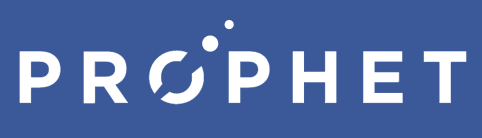

# Préparation des données aux format compatible avec prophet : Date = ds , Ventes = Y

In [36]:
train = train.rename(columns={"date": "ds","sales":"y"})
test = test.rename(columns={"date":"ds","sales":"y"})

# Initialisation du L'object Prophet et l'ajout des regresseurs ( Features ) Stock et revenue

In [37]:
train

,ds,y,revenue,stock
0,2017-01-31,58.0,313.25,297.0
1,2017-02-28,23.0,126.73,133.0
2,2017-03-31,23.0,126.73,62.0
3,2017-04-30,13.0,71.63,28.0
4,2017-05-31,6.0,34.11,28.0
5,2017-06-30,4.0,22.88,7.0
6,2017-07-31,9.0,48.62,38.0
7,2017-09-30,2.0,11.44,5.0
8,2017-10-31,12.0,78.84,82.0
9,2017-11-30,114.0,748.93,703.0


In [38]:
from prophet import Prophet
model = Prophet()
model.add_regressor('stock')
model.add_regressor('revenue')
model.fit(train)
future = model.make_future_dataframe(periods=10, freq='M')

17:58:44 - cmdstanpy - INFO - Chain [1] start processing
17:58:44 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
future["stock"] = train["stock"]
future["revenue"] = train["revenue"]

# Ajout des données test aux repère de forecast pour préparer les prédictions

In [40]:
merged_df = pd.merge(future, test, on='ds', how='left')

In [41]:
merged_df['stock'] = merged_df['stock_x'].fillna(merged_df['stock_y'])
merged_df['revenue'] = merged_df['revenue_x'].fillna(merged_df['revenue_y'])
merged_df = merged_df[['ds', 'stock', 'revenue']]

In [42]:
merged_df = merged_df.dropna()

In [43]:
forecast = model.predict(merged_df)

## Visualisation des prédictions et intervalles de confiances

In [44]:
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objects as go
import plotly.io as pio

In [45]:
fig = plot_plotly(model,forecast)
real_trace = go.Scatter(x=test['ds'],y=test['y'],mode='markers',name='Real Values')
fig.add_trace(real_trace)
fig.update_layout(
    title='Sales Forecast',
    xaxis_title='Date',
    yaxis_title='Sales',
)

## Model Evaluation en utilisant RMSE ( Root Mean Squared Error )

In [46]:
from statsmodels.tools.eval_measures import rmse
predictions = forecast.iloc[-10:]['yhat']
print("RMSE: ",rmse(predictions,test['y']))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5



RMSE:  16.860158713730097


# => On peut maintenant créer une fonction qui résume le processus du Préparation des données pour Prophet

In [47]:
def ProphetForecasting():
    
    product = input('Please enter a product ID')
    split_date = "2019-01-01"
    product_data = monthly_sales_data[monthly_sales_data['product_id'] == str(product)]
    product_data = product_data.groupby('product_id').filter(lambda x: x.index.min().year == 2017 and x.index.max().year == 2019)
    product_data = product_data[(product_data['stock'] != 0) & (product_data['sales'] != 0) & (product_data['revenue'] != 0)]
    product_data = product_data.drop(["product_id"],axis=1)
    #Train test split
    train_data = product_data.loc[product_data.index <= split_date].copy()
    test_data = product_data.loc[product_data.index > split_date].copy()
    train_data = train_data.reset_index()
    test_data = test_data.reset_index()
    train_data = train_data.rename(columns={"date": "ds","sales":"y"})
    test_data = test_data.rename(columns={"date":"ds","sales":"y"})
    #Application De l'algorithme Prophet
    from prophet import Prophet
    model = Prophet()
    model.add_regressor('stock')
    model.add_regressor('revenue')
    model.fit(train_data)
    future = model.make_future_dataframe(periods=10, freq='M')
    future["stock"] = train_data["stock"]
    future["revenue"] = train_data["revenue"]
    
    merged_df = pd.merge(future, test_data, on='ds', how='left')
    merged_df['stock'] = merged_df['stock_x'].fillna(merged_df['stock_y'])
    merged_df['revenue'] = merged_df['revenue_x'].fillna(merged_df['revenue_y'])
    
    merged_df = merged_df[['ds', 'stock', 'revenue']]
    forecast = model.predict(merged_df)
    fig = plot_plotly(model,forecast)
    real_trace = go.Scatter(x=test_data['ds'],y=test_data['y'],mode='markers',name='Real Values')
    fig.update_layout(title=f'Sales Forecast for {product}',xaxis_title='Date',yaxis_title='Sales')  
    fig.add_trace(real_trace)
    pio.show(fig)
    predictions = forecast.iloc[-10:]['yhat']
    print("Root Mean Squared-Error : ",rmse(predictions,test_data['y']))

In [48]:
ProphetForecasting()

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

# Méthode 2 : ARIMA 


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Décomposition de série temporelle

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(example_data['sales'], model='additive', period=10)

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,20))
observed = decomposition.observed.plot(ax=axes[0])
trend = decomposition.trend.plot(ax=axes[1])
season = decomposition.seasonal.plot(ax=axes[2])
residuals = decomposition.resid.plot(ax=axes[3])


# Etude de l'autocorrélation 

In [ ]:
plot_acf(example_data['sales'], alpha = 0.05);

### => On peut déduire une autocorrélation d'ordre p = 3

# Etude de l'autocorrélation partielle

In [ ]:
plot_pacf(example_data['sales'], alpha = 0.05,nlags = 10);

### => Il existe une autocorrélation partille avec un ordre élevée , on peut essayer avec un MA : q = 5

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(example_data['sales'])
adf_statistic = adf[0]
p_value = adf[1]
critical_values = adf[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Critical Values:{critical_values}')

### => P-value > 0.05 : Non rejet de H0 => la série est non-stationnaire 

In [ ]:
import statsmodels.api as sm
model_arima = sm.tsa.ARIMA(example_data['sales'], order=(3, 1, 5),exog=example_data[["revenue","stock"]])

In [ ]:
results = model_arima.fit()

In [ ]:
start_date = '2019-01-31'
end_date = '2019-10-31'
pred = results.predict(start=start_date, end=end_date)

In [ ]:
real_values = example_data.loc[start_date:end_date, 'sales']

In [ ]:
plt.plot(real_values.index, real_values, label='Les valeurs réels')
plt.plot(pred.index, pred, label='Les valeurs Prédits')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('ARIMA Predictions')
plt.legend()
plt.show()

## Evaluation du modèle ARIMA avec MSE ( Mean Squared Error ) 

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(real_values, pred)
print("Mean Squared Error:", mse)